<a href="http://konect.uni-koblenz.de/networks/moreno_zebra"><h2>Zebra Affiliation</h2></a>

This undirected network contains interactions between 28 Grévy's zebras (Equus grevyi) in Kenya. A node represents a zebra and an edge between two zebras shows that there was an interaction between them during the study.

In [62]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np

from itertools import combinations
from nxviz import ArcPlot
from nxviz import CircosPlot
from nxviz import MatrixPlot
from hiveplot import HivePlot
from matplotlib.lines import Line2D



warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#load the network

# Read the edge list

dfzebras = pd.read_csv(
    'data/moreno_zebra/out.moreno_zebra_zebra', sep=' ', skiprows=2, header=None)
dfzebras = dfzebras[[0, 1]]
dfzebras.columns = ['zebra1', 'zebra2']

Gzebras = nx.Graph()
for row in dfzebras.iterrows():
    Gzebras.add_edge(row[1]['zebra1'], row[1]['zebra2'])

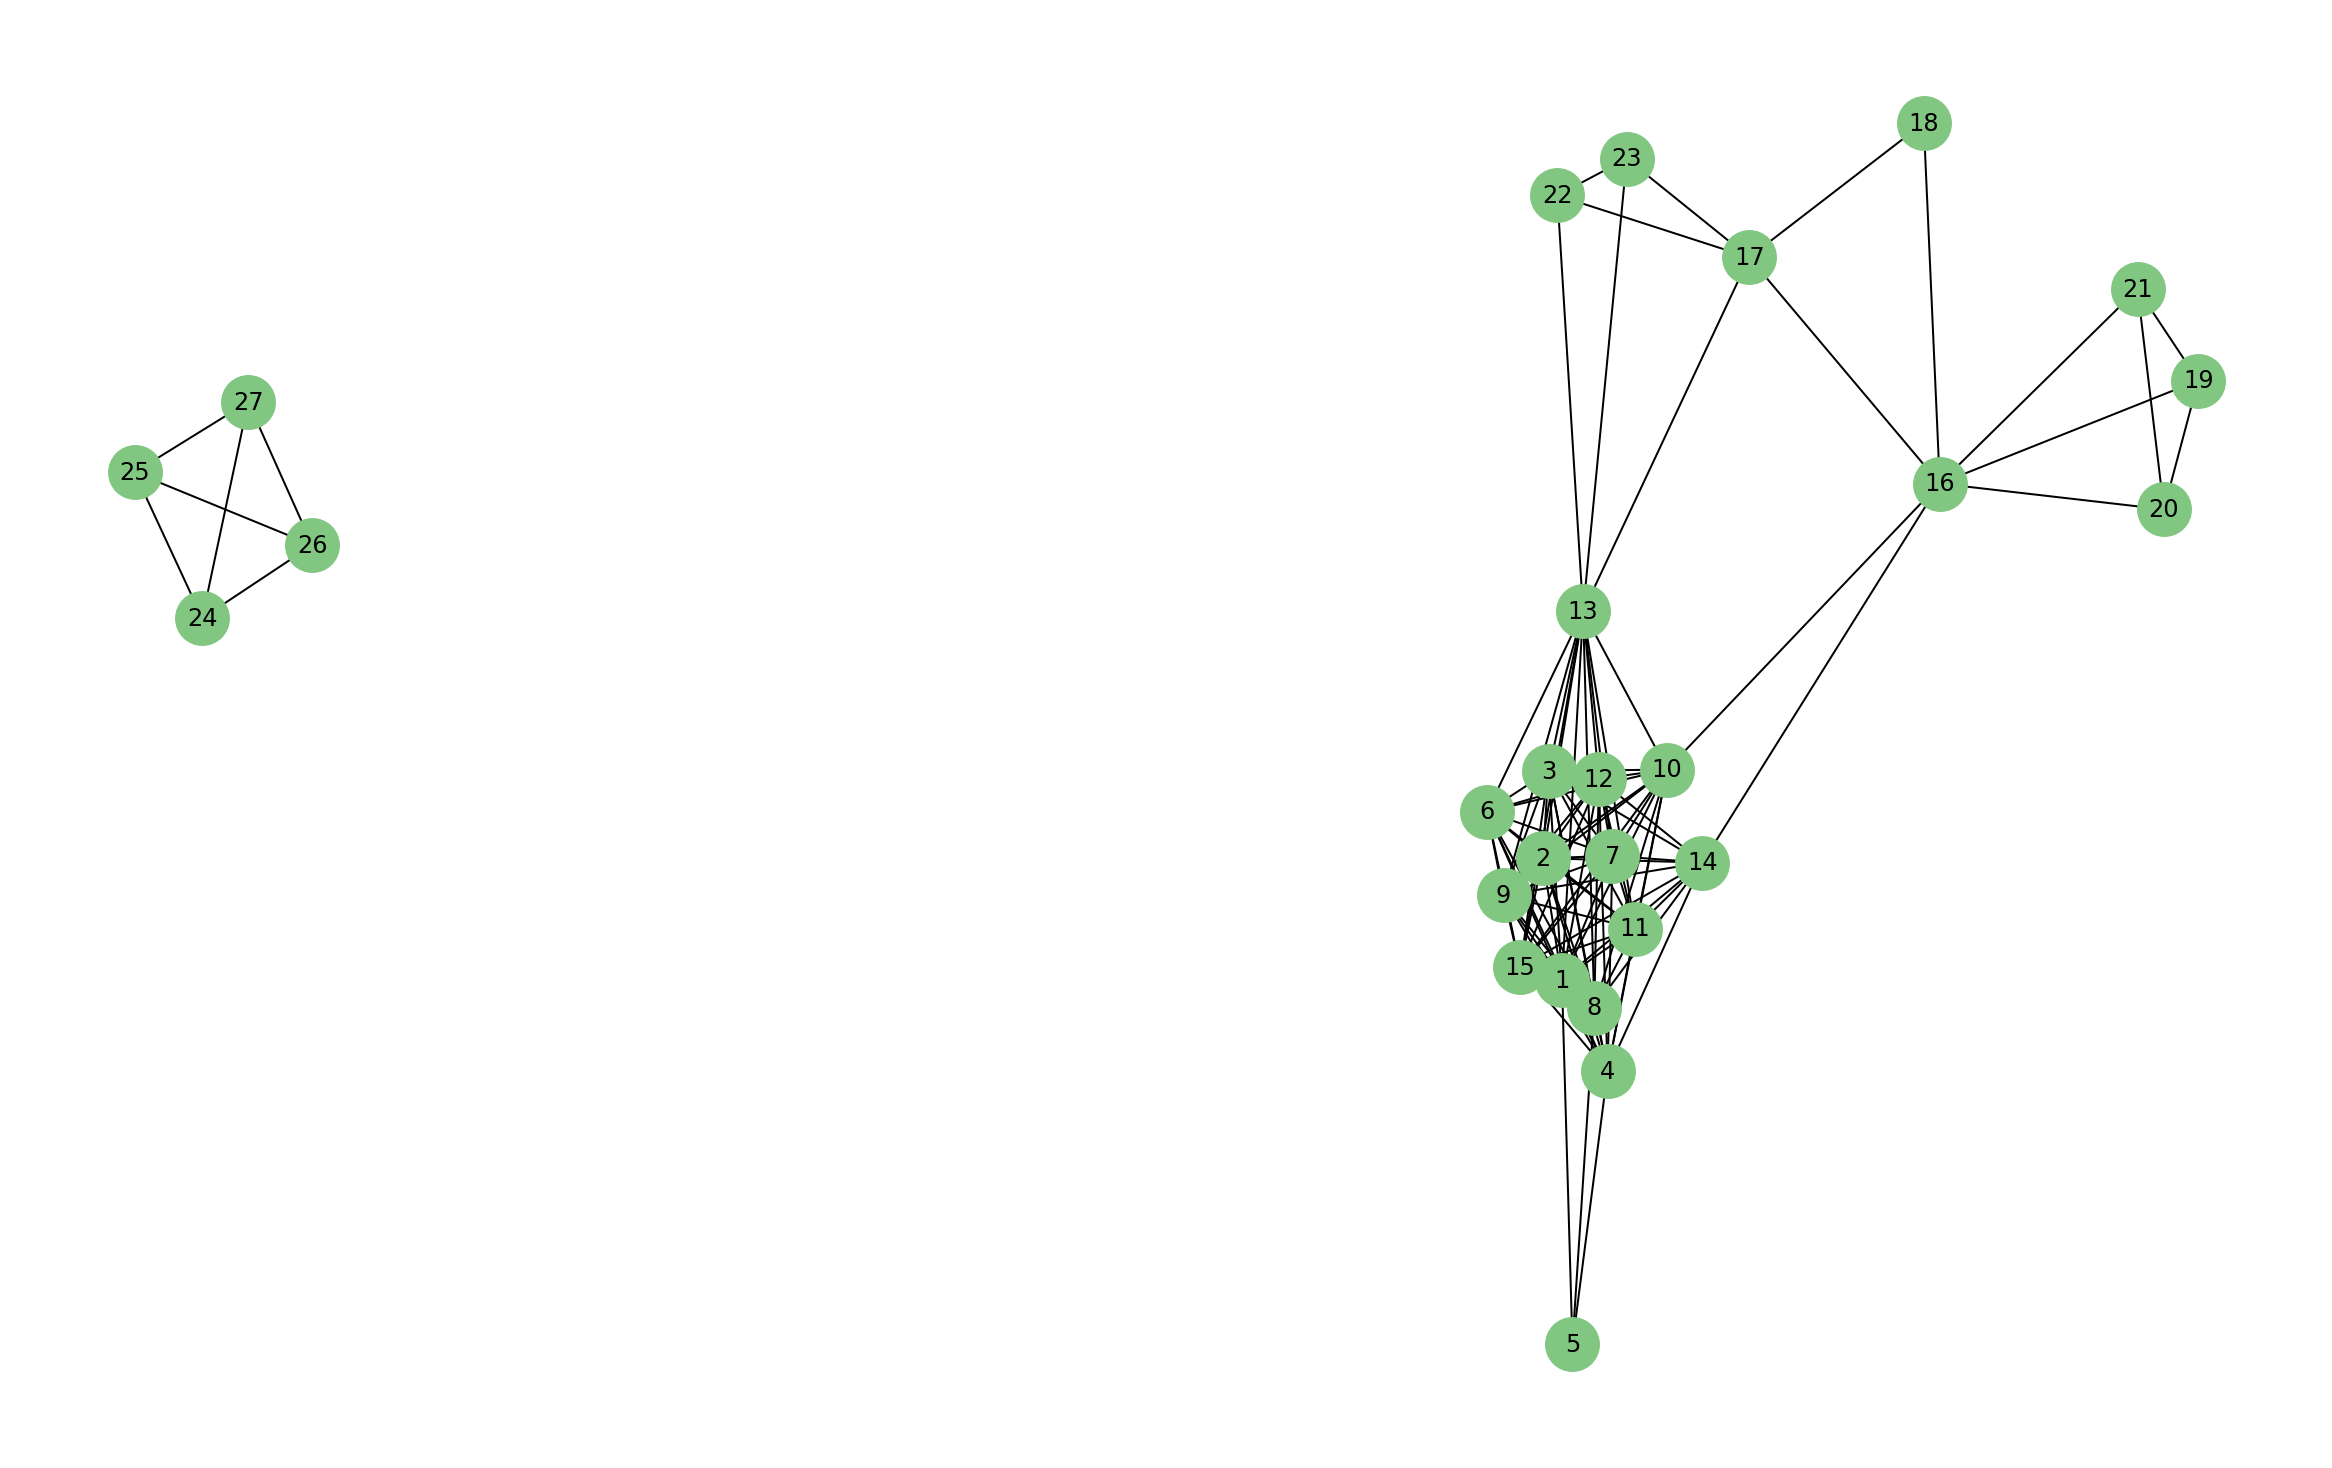

In [95]:
plt.rcParams["figure.figsize"] = (16,10)
nx.draw_spring(Gzebras , with_labels=True , node_color='#81c781' , node_size=700)

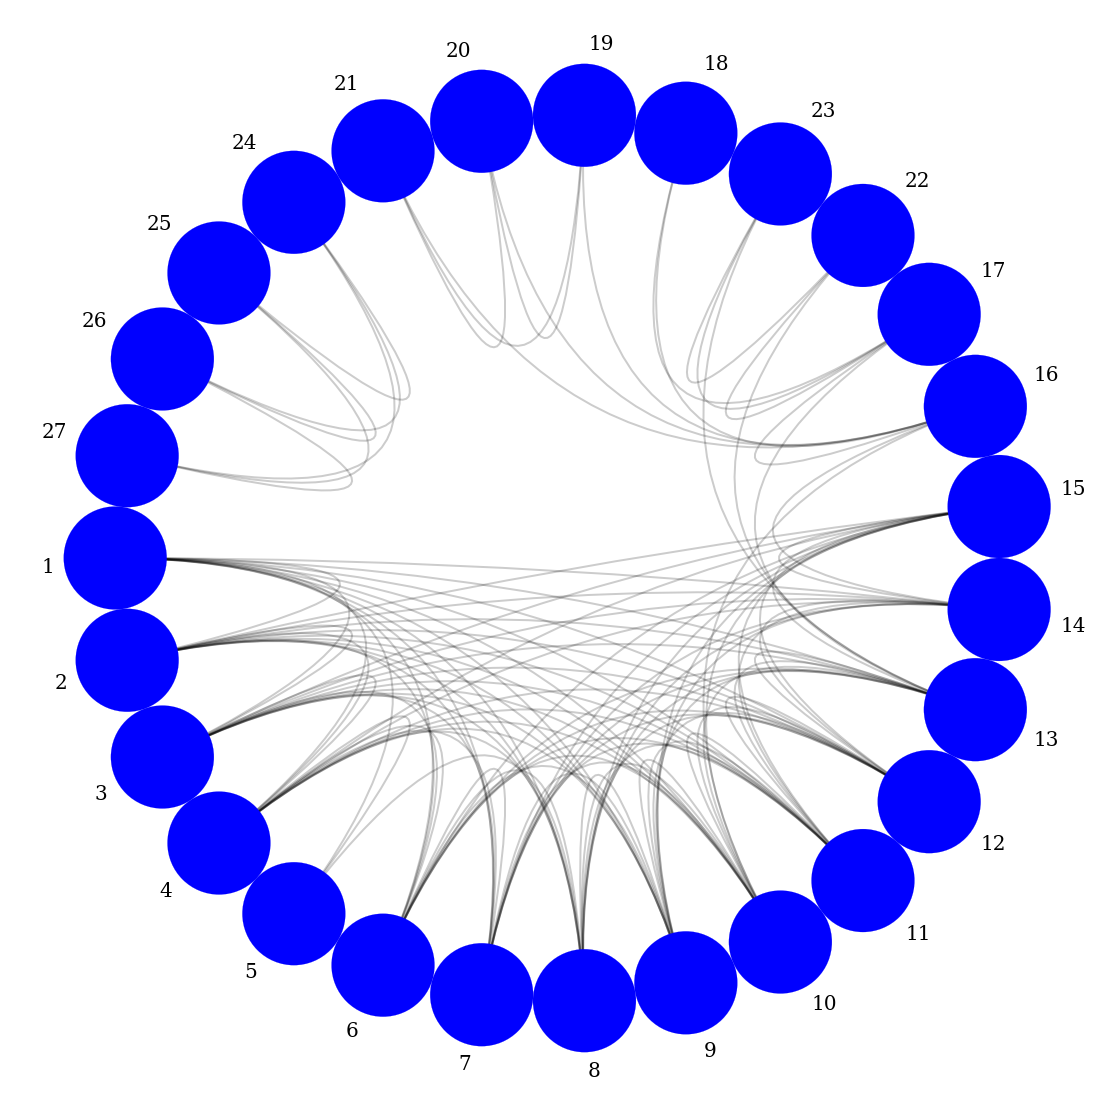

In [4]:
c = CircosPlot(Gzebras , node_labels=True , figsize = (10,10))
c.draw()

<h2>Connected Component</h2>

By looking at these graphs we can infer that the graph can be divided into two smaller subgraphs, which any two vertices are connected by paths, and are connected to no additional vertices of the supergraph.

A subgraph that meets those criteria is called <b>Connected Component</b> (or simply Component).

A vertex with no incident edges is itself a component.

<code>networkx</code> implements a function to find connected component, <code>connected_components()</code>

In [5]:
nx.connected_components(Gzebras)

<generator object connected_components at 0x000001CDE0DD51C8>

In [6]:
# in order to use them better, it's useful to create a list of connected component subgraphs
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

ccsubgraphszebras = list(connected_component_subgraphs(Gzebras))
ccsubgraphszebras

In [7]:
# assign an attribute "subgraph" to the nodes
for i, g in enumerate(ccsubgraphszebras):
    for n in g.nodes():
        Gzebras.nodes[n]['subgraph'] = i

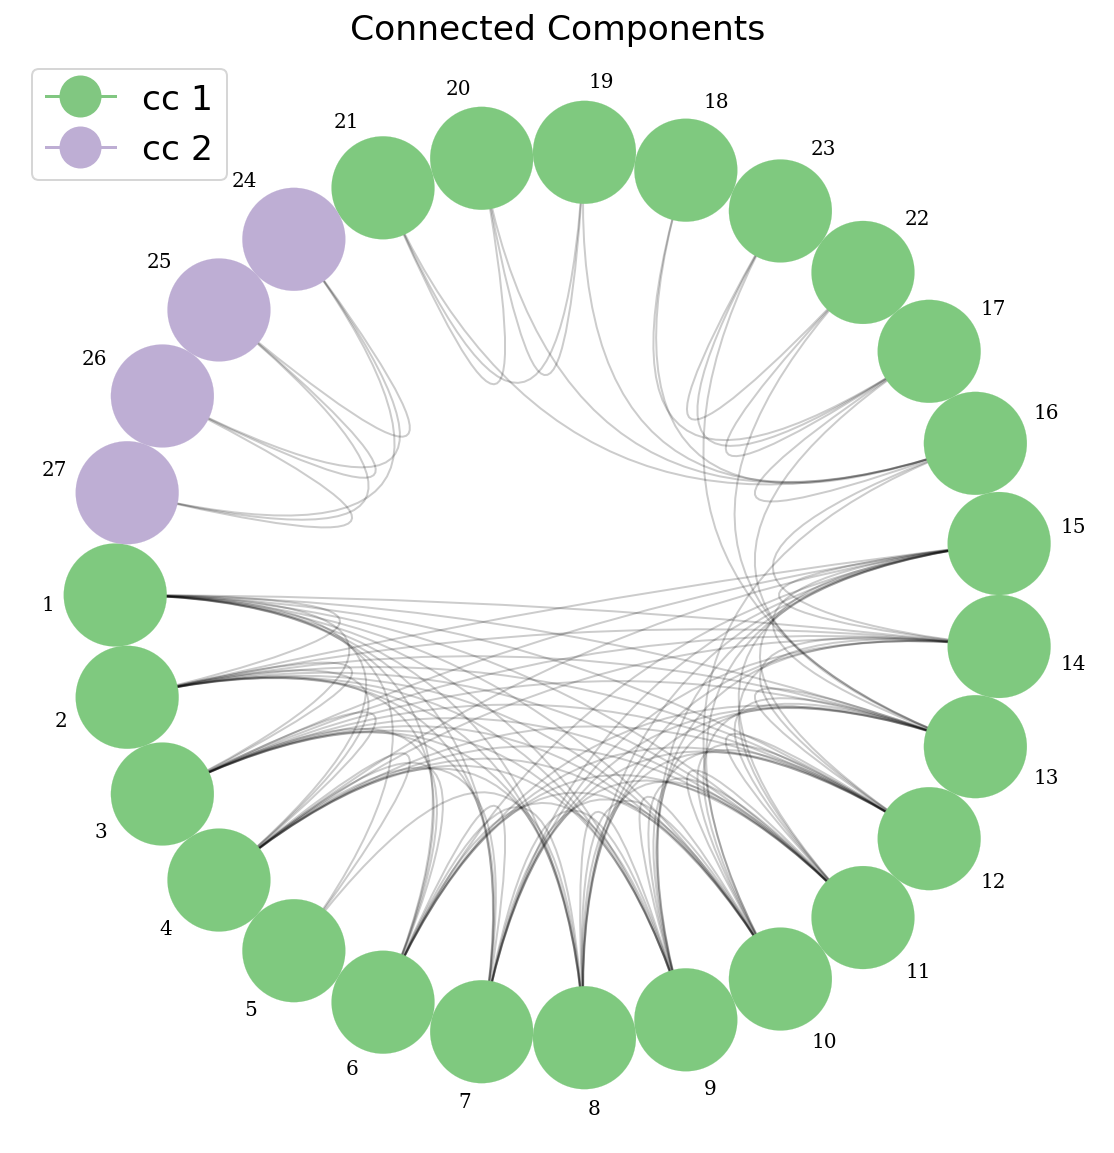

In [8]:
# we can use the attribute to highlight the connected component in a circos plot
c = CircosPlot(Gzebras, node_color='subgraph', node_order='subgraph', node_labels=True , figsize = (10,10))
c.draw()

legend_elements = [Line2D([0], [0], marker='o', color='#81c781', label='cc 1', markerfacecolor='#81c781', markersize=20),
                   Line2D([0], [0], marker='o', color='#beaed4', label='cc 2', markerfacecolor='#beaed4', markersize=20)
                  ]

plt.legend(handles=legend_elements , fontsize='xx-large')
plt.title("Connected Components" , fontsize='xx-large')
plt.show()

<Figure size 1152x720 with 0 Axes>

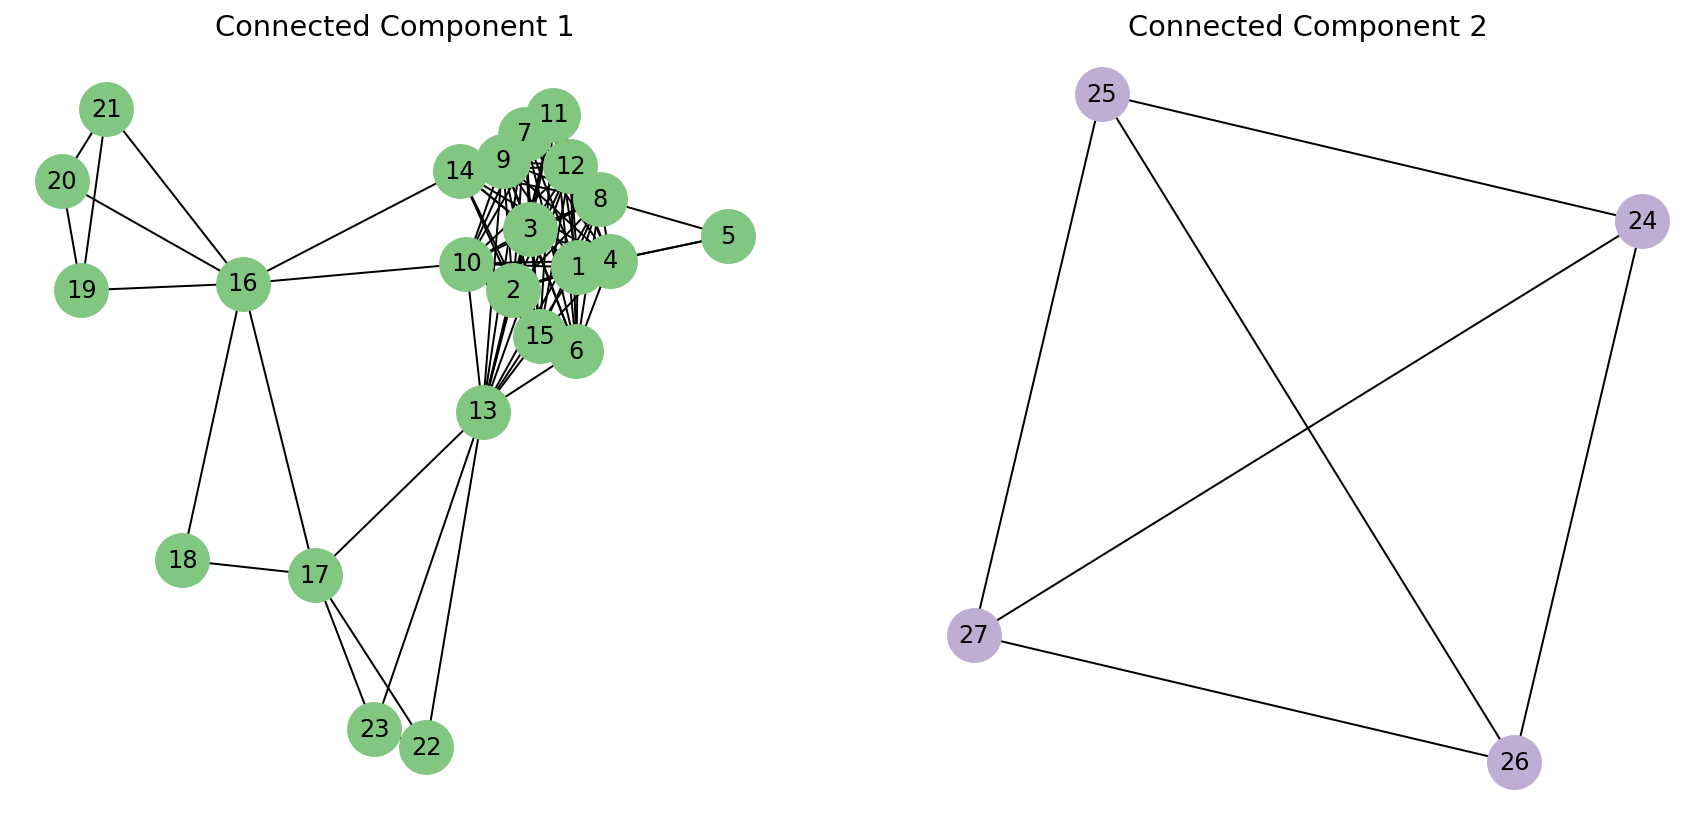

In [130]:
plt.figure()
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
nx.draw(ccsubgraphszebras[0] , with_labels=True , node_color="#81c781" , node_size=700)
plt.title("Connected Component 1" , fontsize='x-large')


plt.subplot(1, 2, 2)
nx.draw(ccsubgraphszebras[1] , with_labels=True , node_color='#beaed4' , node_size=700)
plt.title("Connected Component 2" , fontsize='x-large')

plt.show()

<h2>Path</h2>

In a graph, a path is a sequence of edges which joins a sequence of distinct vertices.

In <code>networkx</code> we can check the existence of a path with <code>has_path(graph, nodeA, nodeB)</code>

We can check that nodes belonging to a connected component subgraph are connected by a path and that there is no path between nodes belonging to different connected components.

In [10]:
def has_all_paths(graphA , graphB):
    for a in graphA:
        for b in graphB:
            assert nx.has_path(Gzebras , a , b) , "Error: no path between nodes " + str (a) + " and " + str (b)
            
def has_no_paths(graphA , graphB):
    for a in graphA:
        for b in graphB:
            assert not nx.has_path(Gzebras , a , b) , "Error: no path between nodes " + str (a) + " and " + str (b)         

In [11]:
has_all_paths(ccsubgraphszebras[0] , ccsubgraphszebras[0])

In [12]:
has_all_paths(ccsubgraphszebras[1] , ccsubgraphszebras[1])

In [125]:
has_no_paths(ccsubgraphszebras[1] , ccsubgraphszebras[0])

<h2>Neighbourhood </h2>

Two nodes are called <b>adjacent</b> if they are connected by an edge.
The <b>neighbourhood</b> of a node n is the graph made of the nodes adjacent to n and the edges connecting them.

In <code>networkx</code> we can use <code>graph.neighbors(node)</code> to find the nodes adjacent to the given node.

In [128]:
# neighbors returns a dict_keyiterator, we'll cast it to list to make it printable
list(Gzebras.neighbors(16))

[10, 14, 17, 18, 19, 20, 21]

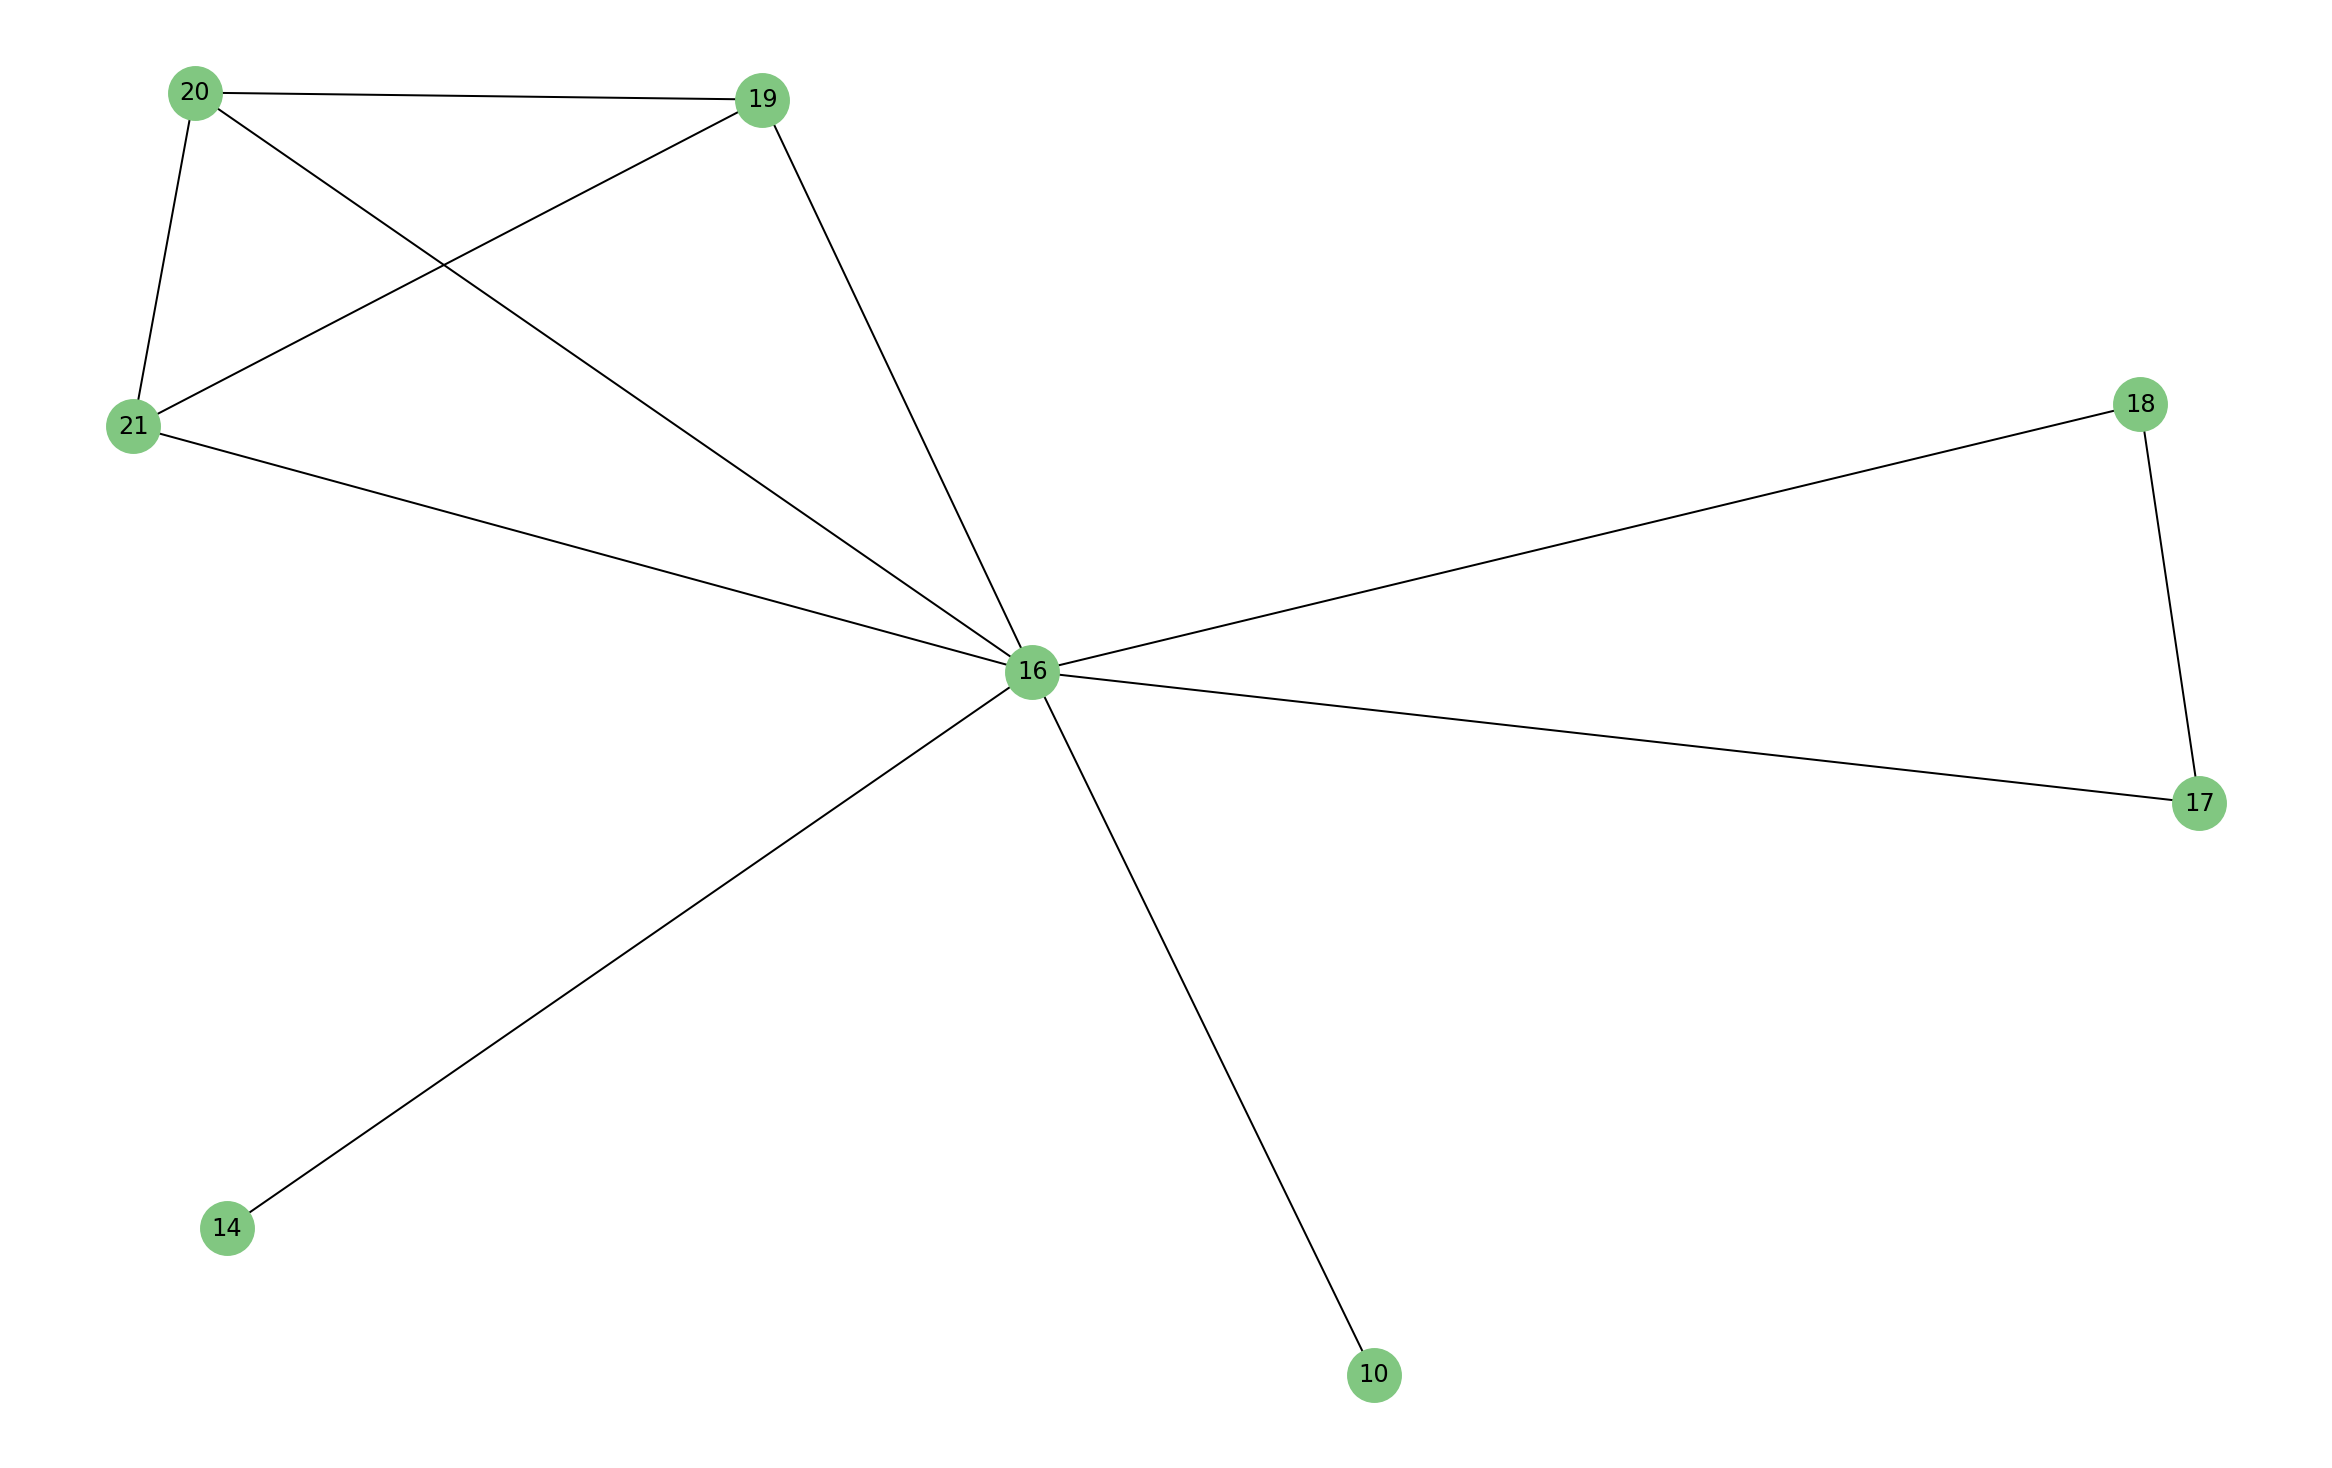

In [132]:
neighbors16 =  list(Gzebras.neighbors(16))
neighbors16.append(16) #aggiungo 16 alla lista dei suoi vicini
nx.draw(Gzebras.subgraph(neighbors16), with_labels=True , node_color="#81c781" , node_size=700)

<h2>Clique</h2>

In the graph theory, a clique is a subset of vertices of an undirected graph such that every two distinct vertices in the clique are adjacent.
In a social network involving people, cliques are groups in which everybody knows everybody.


<code>networkx</code> has a function <code>find_cliques(graph)</code> that find all the maximal cliques (i.e. largest complete subgraph containing a given node) in a graph.

In [24]:
list(nx.find_cliques(Gzebras))

[[4, 1, 2, 3, 9, 11, 12, 6, 10, 8],
 [4, 1, 2, 3, 9, 11, 12, 6, 10, 7],
 [4, 1, 2, 3, 9, 11, 12, 14, 8],
 [4, 1, 2, 3, 9, 11, 12, 14, 7],
 [4, 1, 5, 8],
 [4, 15, 2, 3, 9, 11, 12, 6, 10, 8],
 [4, 15, 2, 3, 9, 11, 12, 6, 10, 7],
 [4, 15, 2, 3, 9, 11, 12, 14, 8],
 [4, 15, 2, 3, 9, 11, 12, 14, 7],
 [13, 17, 22, 23],
 [13, 2, 3, 6, 9, 10, 11, 12, 8, 1],
 [13, 2, 3, 6, 9, 10, 11, 12, 8, 15],
 [13, 2, 3, 6, 9, 10, 11, 12, 7, 1],
 [13, 2, 3, 6, 9, 10, 11, 12, 7, 15],
 [14, 16],
 [16, 19, 20, 21],
 [16, 17, 18],
 [16, 10],
 [24, 25, 26, 27]]

we can also use <code>cliques_containing_node(graph, nodes=node)</code> to lists the cliques that any given node is involved in.

In [46]:
nx.cliques_containing_node(Gzebras, nodes=3)

[[4, 1, 2, 3, 9, 11, 12, 6, 10, 8],
 [4, 1, 2, 3, 9, 11, 12, 6, 10, 7],
 [4, 1, 2, 3, 9, 11, 12, 14, 8],
 [4, 1, 2, 3, 9, 11, 12, 14, 7],
 [4, 15, 2, 3, 9, 11, 12, 6, 10, 8],
 [4, 15, 2, 3, 9, 11, 12, 6, 10, 7],
 [4, 15, 2, 3, 9, 11, 12, 14, 8],
 [4, 15, 2, 3, 9, 11, 12, 14, 7],
 [13, 2, 3, 6, 9, 10, 11, 12, 8, 1],
 [13, 2, 3, 6, 9, 10, 11, 12, 8, 15],
 [13, 2, 3, 6, 9, 10, 11, 12, 7, 1],
 [13, 2, 3, 6, 9, 10, 11, 12, 7, 15]]

we can use <code>number_of_cliques(graph, nodes=node)</code> in orer to find the number of cliques a node is involved in.

In [71]:
nx.number_of_cliques(Gzebras)

{1: 7,
 2: 12,
 3: 12,
 4: 9,
 5: 1,
 6: 8,
 7: 6,
 8: 7,
 9: 12,
 10: 9,
 11: 12,
 12: 12,
 13: 5,
 14: 5,
 15: 6,
 16: 4,
 17: 2,
 22: 1,
 23: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1}

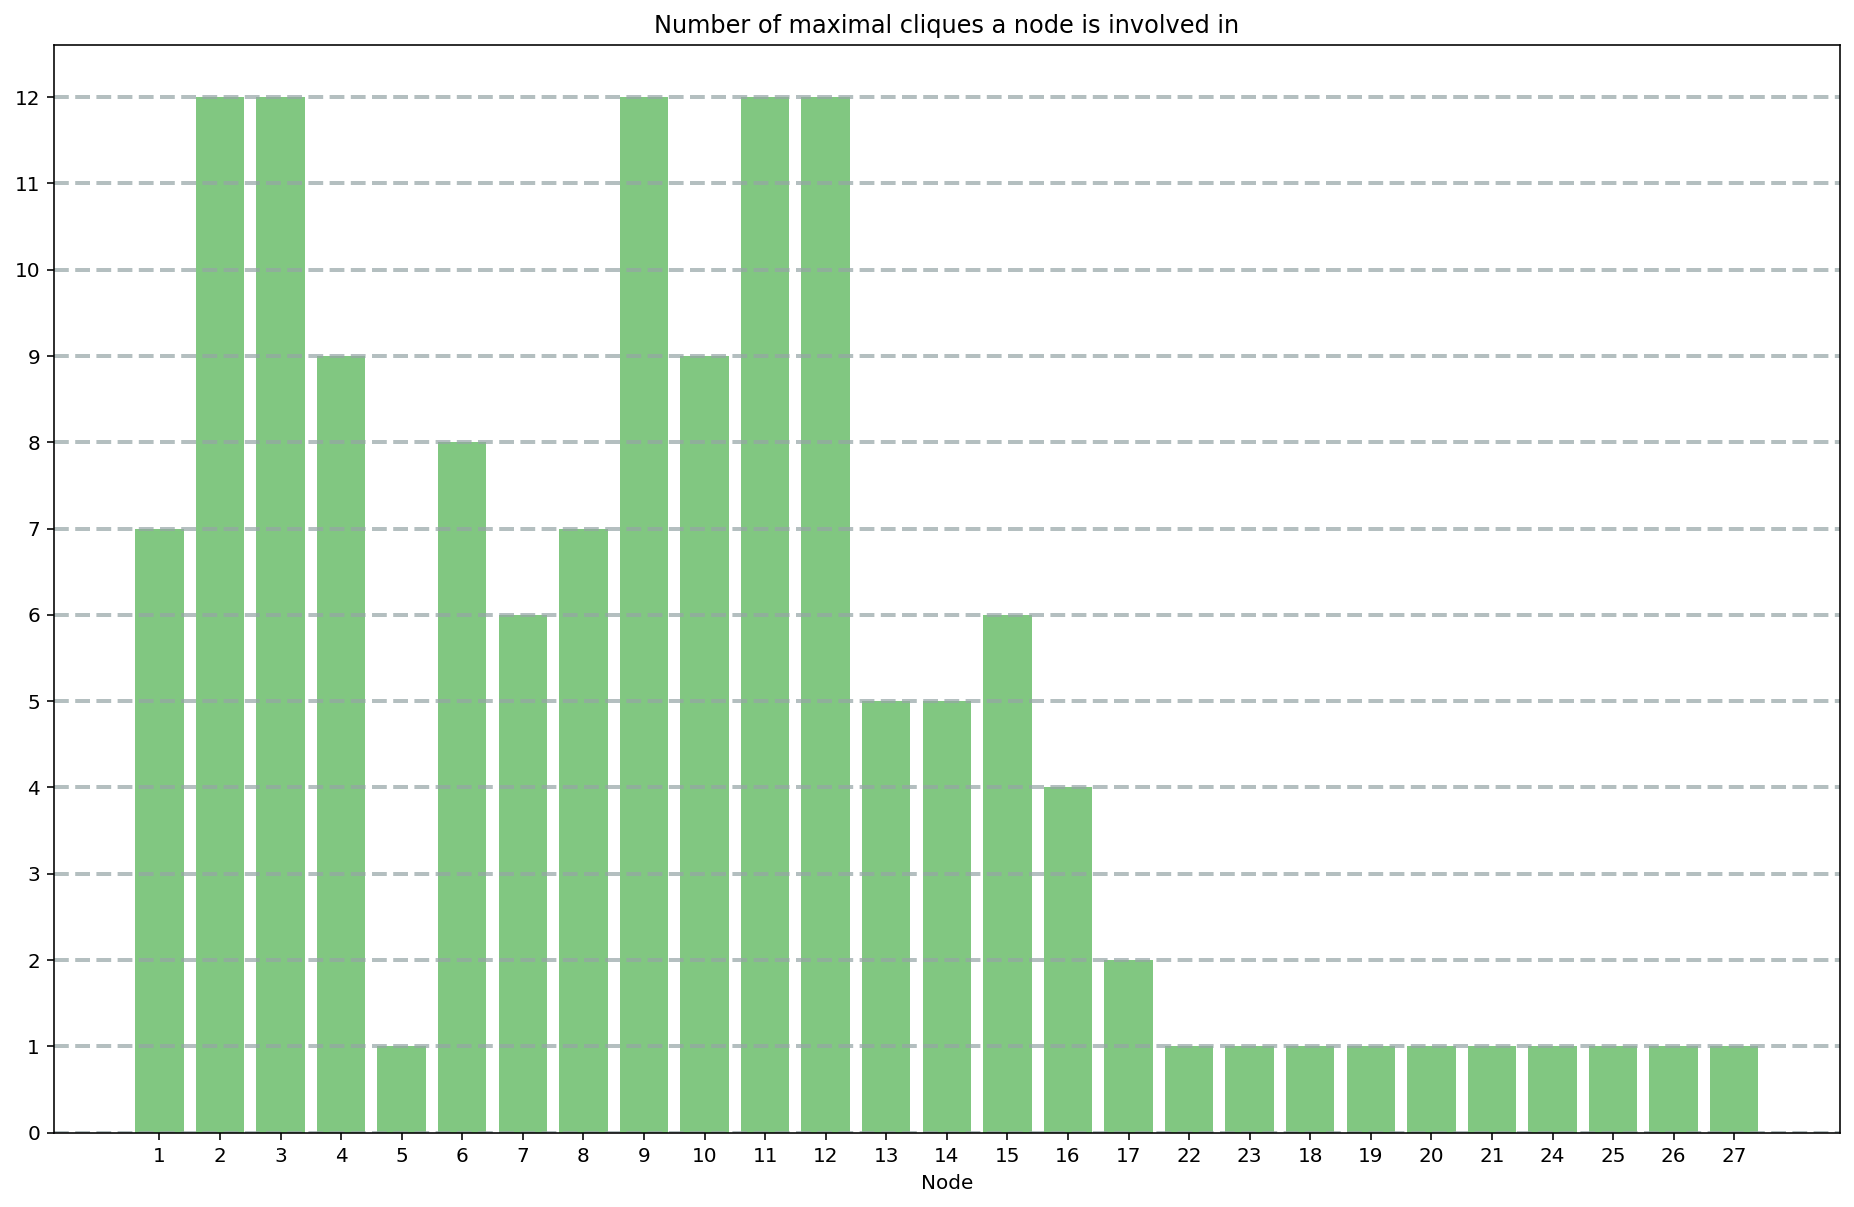

In [103]:
data = nx.number_of_cliques(Gzebras).values()
labels = Gzebras.nodes()
plt.xticks(range(len(data)), labels)
plt.yticks(np.arange(0, 13, step=1))
plt.xlabel('Node')
plt.title('Number of maximal cliques a node is involved in')
plt.bar(range(len(data)), data , color='#81c781') 
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

As we can see more than half of the zebra individuals are involved in many cliques.

In [106]:
nx.cliques_containing_node(Gzebras, nodes=16)

[[14, 16], [16, 19, 20, 21], [16, 17, 18], [16, 10]]

Text(0.5, 1.0, 'Clique 3')

<Figure size 1152x720 with 0 Axes>

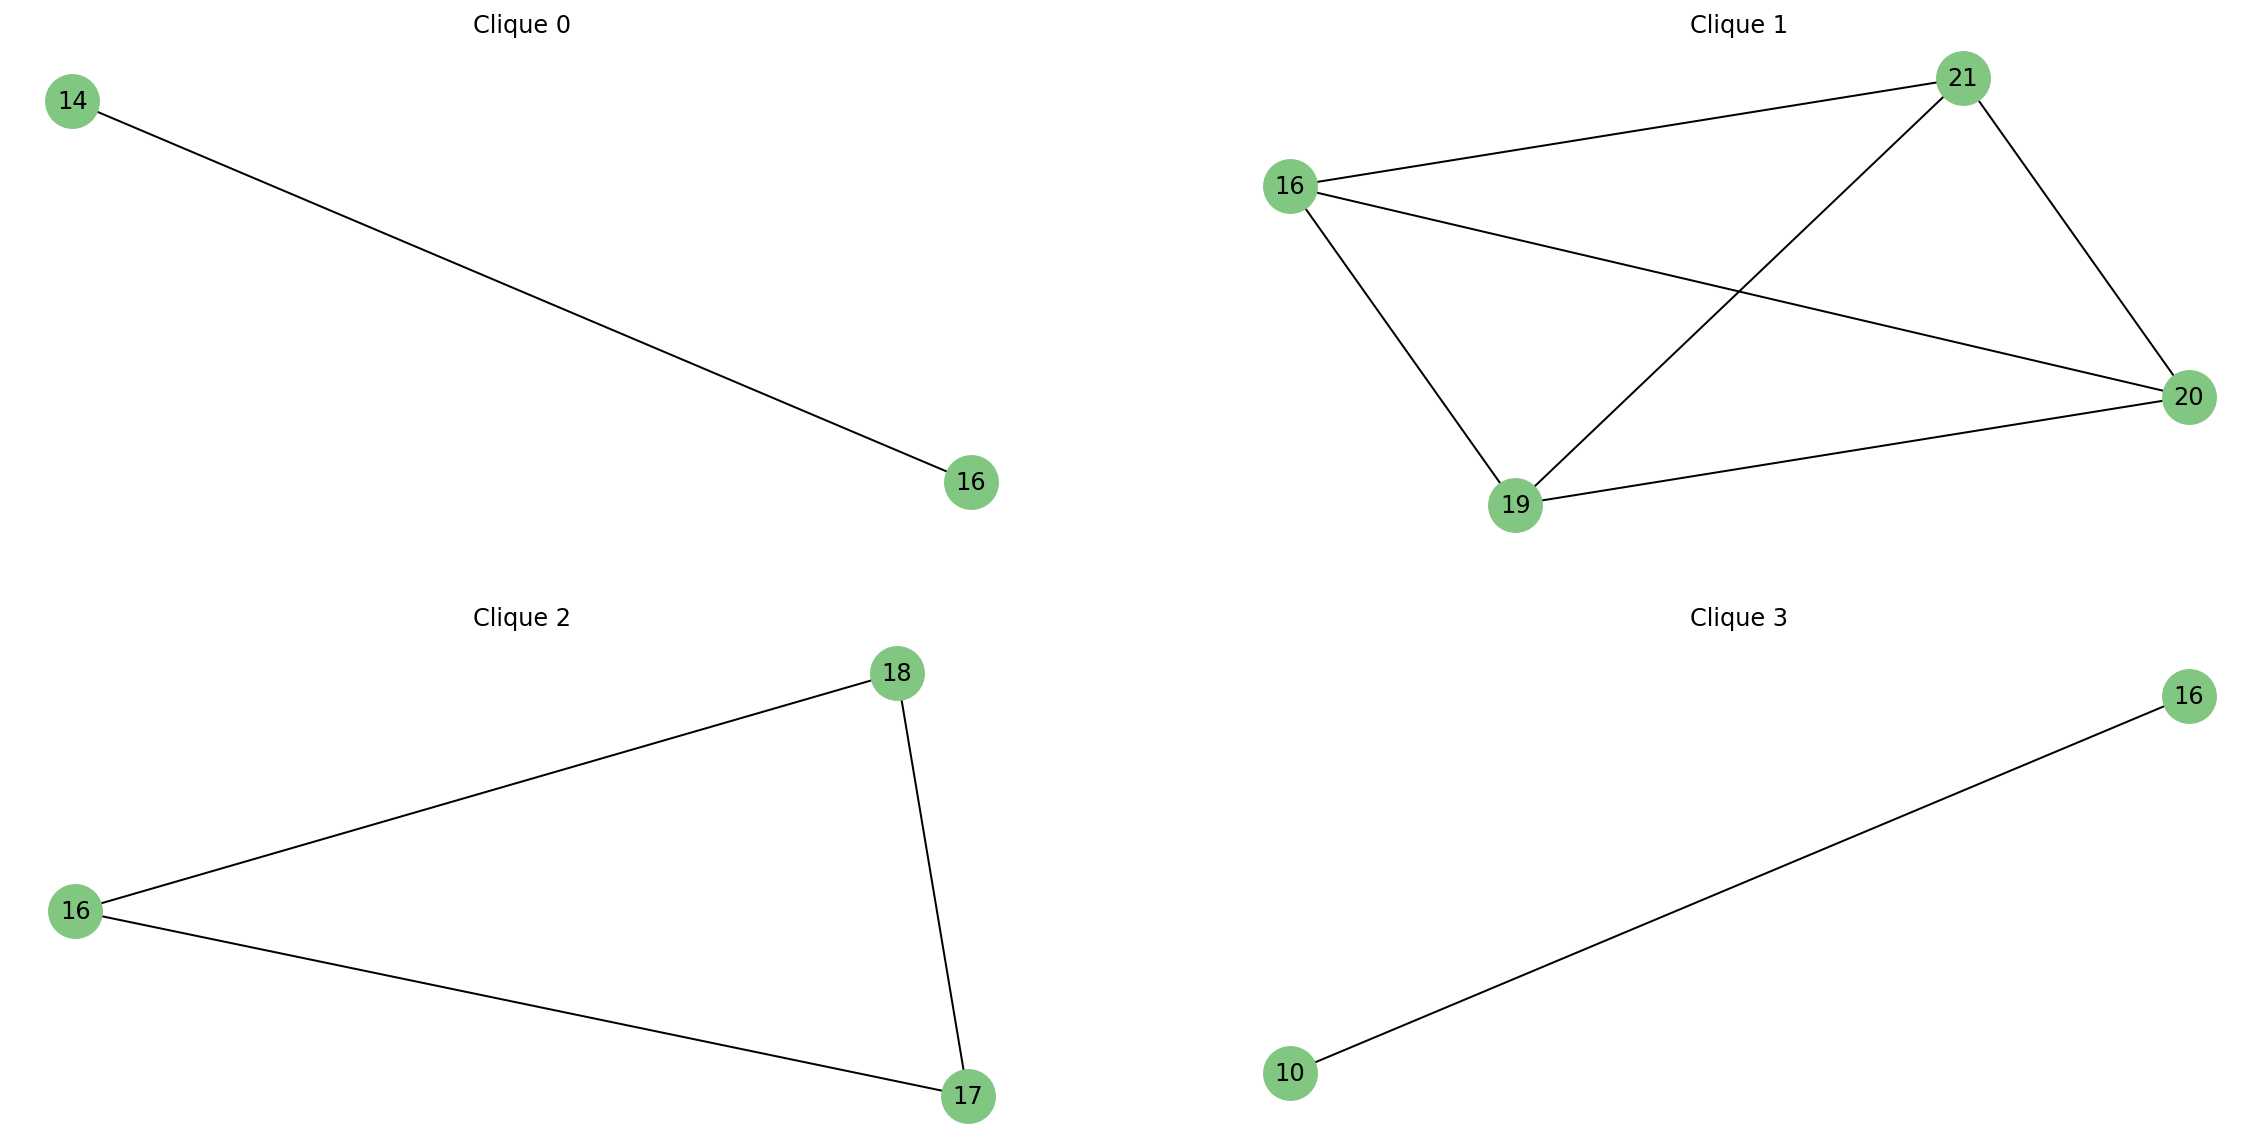

In [131]:
# plotting the maximal clique the node 16 is involved in
plt.figure()
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
nx.draw(Gzebras.subgraph(list(nx.cliques_containing_node(Gzebras, nodes=16))[0]) , with_labels=True , node_color="#81c781" , node_size=700)
plt.title('Clique 0')

plt.subplot(2, 2, 2)
nx.draw(Gzebras.subgraph(list(nx.cliques_containing_node(Gzebras, nodes=16))[1]) , with_labels=True , node_color="#81c781" , node_size=700)
plt.title('Clique 1')

plt.subplot(2, 2, 3)
nx.draw(Gzebras.subgraph(list(nx.cliques_containing_node(Gzebras, nodes=16))[2]) , with_labels=True , node_color="#81c781" , node_size=700)
plt.title('Clique 2')

plt.subplot(2, 2, 4)
nx.draw(Gzebras.subgraph(list(nx.cliques_containing_node(Gzebras, nodes=16))[3]) , with_labels=True , node_color="#81c781" , node_size=700)
plt.title('Clique 3')